3. For this problem, you will train two models on Fashion MNIST:
Train for 40 epochs. You may use the demo scripts from lecture and discussion. Produce histograms for the weights of these two networks – a separate histogram for the two layers (the input and hidden layers) in each case. Describe the qualitative differences between these histograms.

In [ ]:
!pip install imgaug==0.2.5
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 562 kB 6.7 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561439 sha256=db8acd52d0bac99d50ed2276d1e4e0b3d4e5dab5e8e82e371c7ed229d645a971
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 8.4 MB/s 
     |████████████████████████████████| 965 kB 48.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# Importing the necessary libraries.
import numpy as np
import torch
import torch.nn as nn # nn -> Neural Network.
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Loading the training dataset.
training_dataset = torchvision.datasets.FashionMNIST(root = f"data", train = True, download = True, transform = transforms.ToTensor()) # Converting the dataset to tensor.
testing_dataset = torchvision.datasets.FashionMNIST(root = f"data", train = False, download = True, transform = transforms.ToTensor()) 
# Loading the testing dataset.
trainingdataset_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 100, shuffle = True) # Shuffling the training dataset.
testingdataset_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = 100, shuffle = False)
# Defining the number of pixels.
pixel_size = 28 * 28
# Loss function initialization.
loss_function = nn.CrossEntropyLoss()

(1). One hidden layer with ReLU activation, 128 nodes, no regularization with no dropout.

In [ ]:
# Initializing the single hidden layer and ReLU activation:
class Neural_network1(nn.Module):
    def __init__(self):
        super(Neural_network1, self).__init__()
        self.hidden_layer1 = nn.Linear(in_features = 28 * 28, out_features = 128)
        self.output = nn.Linear(in_features = 128, out_features = 10)

    def forward(self, n): # Forward propagation function.
        n = F.relu(self.hidden_layer1(n)) # Activation function -> ReLU.
        return self.output(n)
# Defining the model:
model_1 = Neural_network1()
# Defining the (standard) Stochastic Gradient Descent optimizer for model:
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr = 0.02) # Learning rate = 0.02.
# Initializing the number of epochs and defining the lists for: loss during training & testing phase, accuracy during training & testing phase.
epochs = 40
training_loss = []
training_accuracy = []
testing_loss = []
testing_accuracy = []
# Looping over the epochs:
for ele in range(epochs):
    correct_training = 0
    correct_testing = 0
    train_loss = 0
    test_loss = 0
    # Training the model:
    for images, labels in trainingdataset_loader:
        input = images.view(-1, 28 * 28)
        # Forward propagation:
        output = model_1(input)
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        loss = loss_function(output, labels) # Implementing the loss function.
        correct_training += (pred == labels).sum().numpy()
        train_loss += loss.data # Storing the loss during the training phase.
        # Backward propagation:
        optimizer_1.zero_grad()
        loss.backward()
        optimizer_1.step()
    # Testing the model:
    for images, labels in testingdataset_loader:
        input = images.view(-1, 28 * 28)
        # Forward propagation:
        output = model_1(input)
        loss = loss_function(output, labels) # Implementing the loss function.
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        correct_testing += (pred == labels).sum().numpy()
        test_loss += loss.data # Storing the loss during the testing phase.
    # Appending the final loss and accuracy during both the phases (training & testing):
    training_loss.append(train_loss / len(trainingdataset_loader.dataset))
    training_accuracy.append(correct_training / len(trainingdataset_loader.dataset))
    testing_loss.append(test_loss / len(testingdataset_loader.dataset))
    testing_accuracy.append(correct_testing / len(testingdataset_loader.dataset))
# Printing the accuracies:
print('Final accuracy during the training phase:' , training_accuracy[-1] * 100, '%') 
print('Final accuracy during the training phase:' , testing_accuracy[-1] * 100, '%')

Final accuracy during the training phase: 89.09166666666667 %
Final accuracy during the training phase: 86.02 %


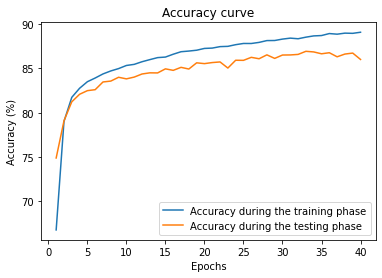

In [ ]:
# Plotting the accuracy graph:
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(range(1, epochs + 1), np.array(training_accuracy) * 100, label = "Accuracy during the training phase")
plt.plot(range(1, epochs + 1), np.array(testing_accuracy) * 100, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

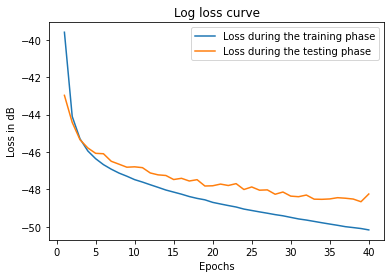

In [ ]:
# Plotting the loss graph:
plt.title("Log loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(training_loss)), label = "Loss during the training phase")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(testing_loss)), label = "Loss during the testing phase")
plt.legend()
plt.show()

(2). One hidden layer with ReLU activation, 48 nodes, L2 regularization with coefficient λ = 0.0001 and dropout with rate 0.2 at the hidden layer.

In [ ]:
# Initializing the single hidden layer and ReLU activation:
class Neural_network2(nn.Module):
    def __init__(self):
        super(Neural_network2, self).__init__()
        self.hidden_layer1 = nn.Linear(in_features = 28 * 28, out_features = 48)
        self.output = nn.Linear(in_features = 48, out_features = 10)
        self.drop = nn.Dropout(0.2) # Dropping neurons with 20% probability.

    def forward(self, n):
        n = F.relu(self.hidden_layer1(n)) # Activation function -> ReLU.
        n = self.drop(n)
        return self.output(n)
# Defining the model:
model_2 = Neural_network2()
# Defining the (standard) Stochastic Gradient Descent optimizer for model:
optimizer_2 = torch.optim.SGD(model_2.parameters(), lr = 0.02, weight_decay = 0.0002) # Learning rate = 0.02 & lambda = 0.0001 or 10^(-3).
# Initializing the number of epochs and defining the lists for: loss during training & testing phase, accuracy during training & testing phase.
epochs = 40
training_loss = []
training_accuracy = []
testing_loss = []
testing_accuracy = []
# Looping over the epochs:
for num in range(epochs):
    correct_training = 0
    correct_testing = 0
    train_loss = 0
    test_loss = 0
    # Training the model:
    for images, labels in trainingdataset_loader:
        input = images.view(-1, 28 * 28)
        # Forward propagation.
        output = model_2(input)
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        loss = loss_function(output,labels) # Implementing the loss function.
        correct_training += (pred == labels).sum().numpy()
        train_loss += loss.data # Storing the loss during the training phase.
        # Backward propagation.
        optimizer_2.zero_grad()
        loss.backward()
        optimizer_2.step()
    # Testing the model:
    for images, labels in testingdataset_loader:
        input = images.view(-1, 28 * 28)
        # Forward propagation.
        output = model_2(input)
        loss = loss_function(output, labels) # Implementing the loss function.
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        correct_testing += (pred == labels).sum().numpy()
        test_loss += loss.data # Storing the loss during the testing phase.
    # Appending the final loss and accuracy during both the phases (training & testing):
    training_loss.append(train_loss / len(trainingdataset_loader.dataset))
    training_accuracy.append(correct_training / len(trainingdataset_loader.dataset))
    testing_loss.append(test_loss / len(testingdataset_loader.dataset))
    testing_accuracy.append(correct_testing / len(testingdataset_loader.dataset))
# Printing the accuracies:
print('Final accuracy during the training phase:' , training_accuracy[-1] * 100, '%') 
print('Final accuracy during the training phase:' , testing_accuracy[-1] * 100, '%')

Final accuracy during the training phase: 87.15166666666667 %
Final accuracy during the training phase: 85.31 %


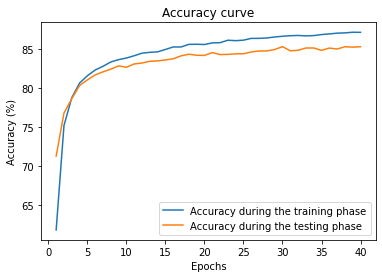

In [ ]:
# Plotting the accuracy graph:
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(range(1, epochs + 1), np.array(training_accuracy) * 100, label = "Accuracy during the training phase")
plt.plot(range(1, epochs + 1), np.array(testing_accuracy) * 100, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

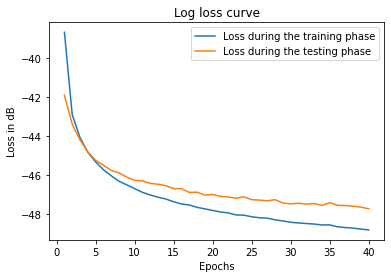

In [ ]:
# Plotting the loss graph:
plt.title("Log loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(training_loss)), label = "Loss during the training phase")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(testing_loss)), label = "Loss during the testing phase")
plt.legend()
plt.show()

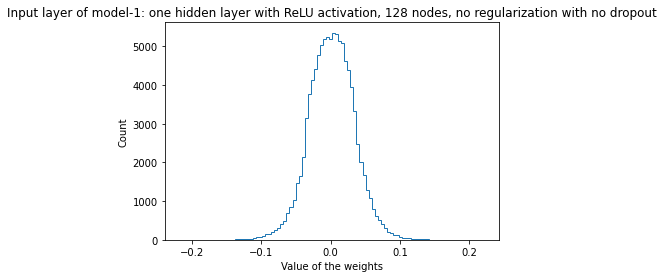

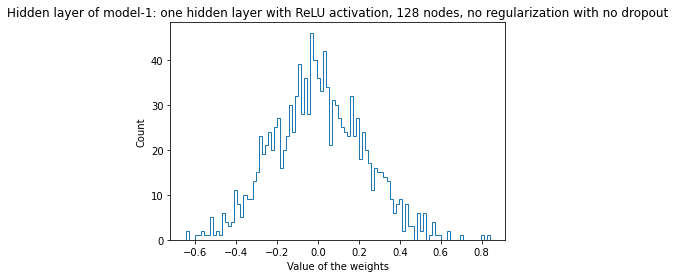

In [ ]:
# Detaching the weights from both the models.
input_layer128 = model_1.hidden_layer1.weight.cpu().detach().numpy()
hidden_layer128 = model_1.output.weight.cpu().detach().numpy()
input_layer48regularized = model_2.hidden_layer1.weight.cpu().detach().numpy()
hidden_layer48regularized = model_2.output.weight.cpu().detach().numpy()
# Plotting the histograms of the weights:
count_1, bins_1 = np.histogram(input_layer128, bins = 100)
count_2, bins_2 = np.histogram(hidden_layer128, bins = 100)
count_3, bins_3 = np.histogram(input_layer48regularized, bins = 100)
count_4, bins_4 = np.histogram(hidden_layer48regularized, bins = 100)

fig_1 = plt.figure(1)
plt.stairs(count_1, bins_1)
plt.xlabel("Value of the weights")
plt.ylabel("Count")
plt.title("Input layer of model-1: one hidden layer with ReLU activation, 128 nodes, no regularization with no dropout")
plt.show()

fig_2 = plt.figure(2)
plt.stairs(count_2, bins_2)
plt.xlabel("Value of the weights")
plt.ylabel("Count")
plt.title("Hidden layer of model-1: one hidden layer with ReLU activation, 128 nodes, no regularization with no dropout")
plt.show()

The weights at the input layer resembles a normal distribution (i.e., a Gaussian bell shaped curve) centred at 0 (mean) and its tails barely crossing 0.1 on either side. However, the weights at the hidden layer looks dispersed. Even though, its centred at 0, the tails are quite far apart from the centre. Since there is no regularization used and no neurons are dropped, the graph somewhat resembles a bell-shaped curve. The ups and downs in the hidden layer graph is the result of the stochastic gradient descent optimization. Since there is no regularization, the weight values are higher in magnitude. The first curve is thinner compared to the second graph.

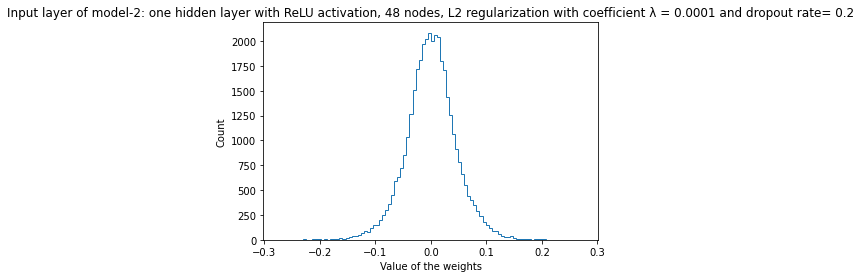

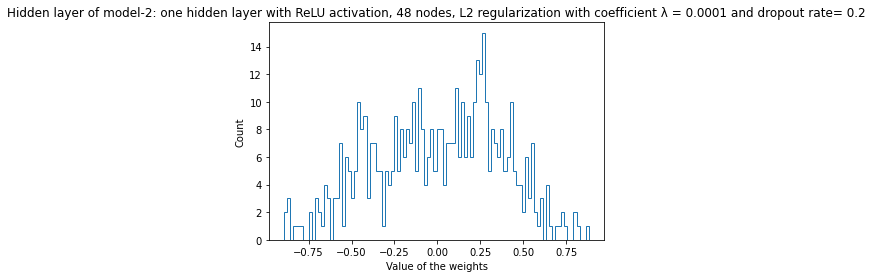

In [ ]:
fig_3 = plt.figure(1)
plt.stairs(count_3, bins_3)
plt.xlabel("Value of the weights")
plt.ylabel("Count")
plt.title("Input layer of model-2: one hidden layer with ReLU activation, 48 nodes, L2 regularization with coefficient λ = 0.0001 and dropout rate= 0.2")
plt.show()

fig_4 = plt.figure(2)
plt.stairs(count_4, bins_4)
plt.xlabel("Value of the weights")
plt.ylabel("Count")
plt.title("Hidden layer of model-2: one hidden layer with ReLU activation, 48 nodes, L2 regularization with coefficient λ = 0.0001 and dropout rate= 0.2")
plt.show()

The weights at the input layer resembles a normal distribution (i.e., a Gaussian bell shaped curve) centred at 0 (mean) and its tails barely crossing 0.2 on either side. However, the weights at the hidden layer looks dispersed. The weights are bounded by the L2 regularization and it is clearly evident in the above graph (the magnitude of the weights is less, value of the weights are not exploding to a higher magnitude). The dropout of the neurons is visible in the graph and therefore the graph looks distorted (since the laziness of the neurons are removed and each neuron is taking a higher value). The ups and downs in the hidden layer graph is the result of the stochastic gradient descent optimization.